In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from typing import Tuple

In [2]:
def makeModel(inputShape: Tuple[int]) -> keras.Model:
    """
    Source: https://www.tensorflow.org/guide/keras/functional#a_toy_resnet_model
    
    Note that I tend to prefer the super-explicit (if somewhat verbose) style. 
    This style is technically unnecessary, but it helps with readability.
    """
    inputs = keras.Input(shape=inputShape, name="Input")
    x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(inputs)
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(x)
    block_1_output = layers.MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x)

    x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same")(block_1_output)
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same")(x)
    block_2_output = layers.add([x, block_1_output])

    x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same")(block_2_output)
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same")(x)
    block_3_output = layers.add([x, block_2_output])

    x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(block_3_output)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(units=256, activation="relu")(x)
    x = layers.Dense(units=256, activation="relu")(x)
    x = layers.Dense(units=256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units=2, activation="softmax")(x)

    return keras.Model(inputs=inputs, outputs=outputs, name="Simple_ResNet")

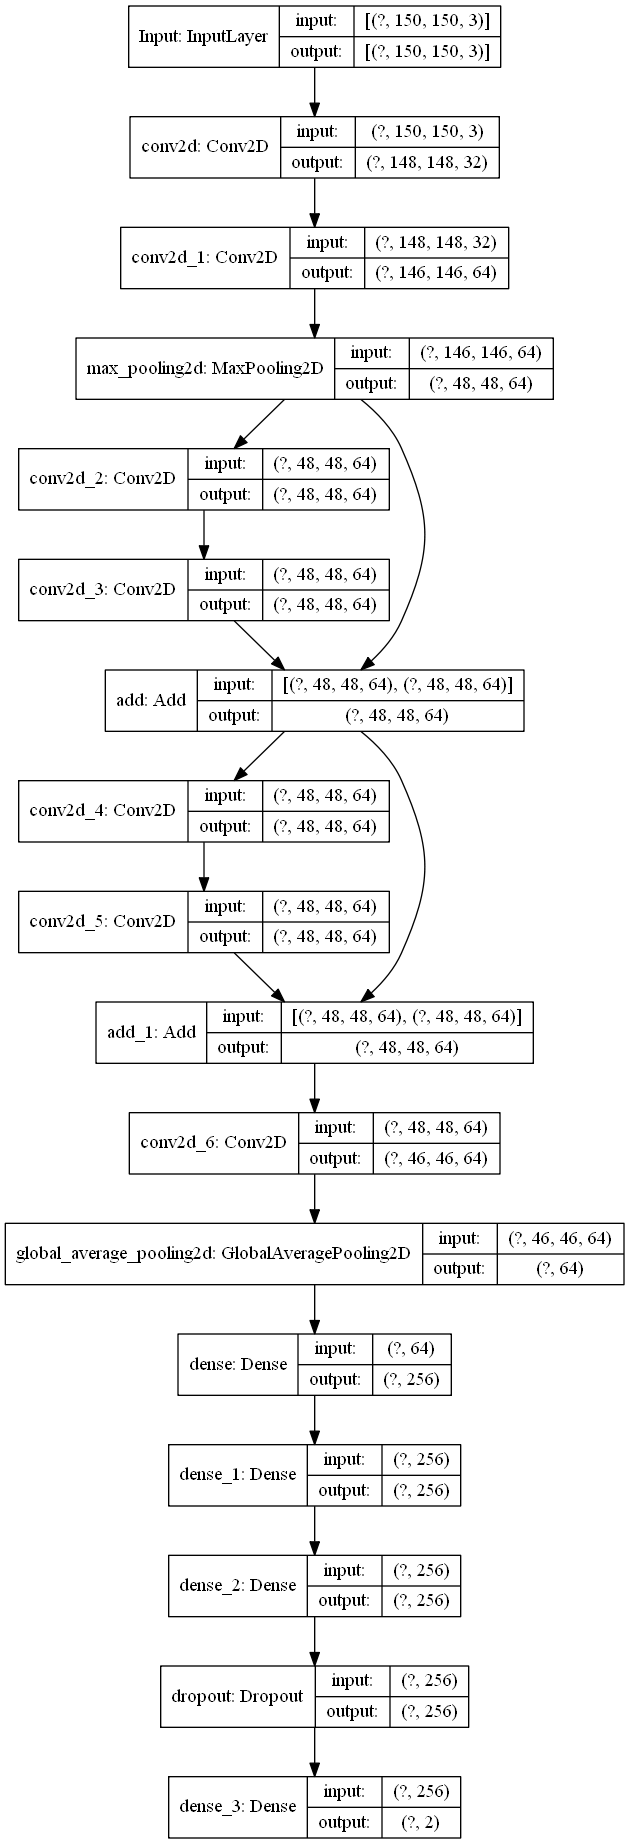

In [3]:
keras.utils.plot_model(makeModel((150, 150, 3)), "simpleResNet.png", show_shapes=True)